# Siamese network 

Code defines a Siamese network architecture using Keras. The siamese_network function creates the Siamese network model by defining two input branches sharing the same base network. The base network is created using the create_base_network function, which consists of convolutional and pooling layers followed by dense layers. The model then computes the Euclidean distance between the output embeddings of the two input images using a Lambda layer with the euclidean_distance function. Finally, the Siamese model is created using the Model class provided by Keras.

In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 128)          4353088     ['input_1[0][0]',                
                                                                  'input_2[0][0]']          


<font color='green'>

siamese_network function now takes two input images (input_a and input_b) and computes their similarity using the Siamese network architecture. The create_base_network function remains the same, defining the base network shared by both input branches.

After defining the Siamese network model, it can load two example images, preprocess them to the desired size, and then compute their similarity using the predict method of the Siamese model. Finally, the similarity score between the two images is printed.

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_4 (Functional)           (None, 128)          4353088     ['input_7[0][0]',                
                                                                  'input_8[0][0]']          

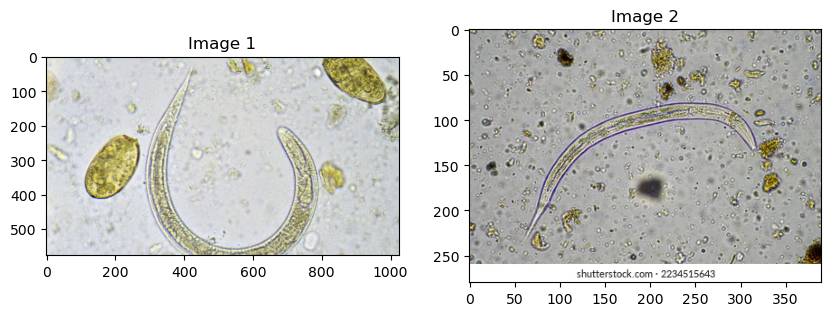

In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load two example images
image_path1 = 'img/1.jpg'
image_path2 = 'img/2.webp'

target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity:", similarity[0][0])




# Load two example images
image_path1 = image_path1
image_path2 = image_path2

# Display the two images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()



Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_11 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_6 (Functional)           (None, 128)          4353088     ['input_10[0][0]',               
                                                                  'input_11[0][0]']         

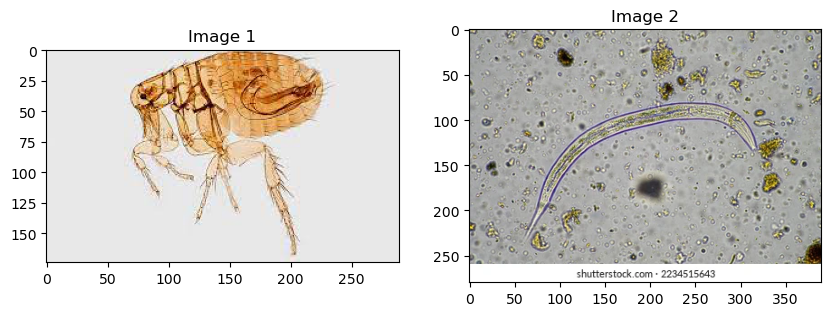

In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load two example images
image_path1 = 'img/4.jpeg'
image_path2 = 'img/2.webp'

target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity:", similarity[0][0])




# Load two example images
image_path1 = image_path1
image_path2 = image_path2

# Display the two images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()



Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_14 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_8 (Functional)           (None, 128)          4353088     ['input_13[0][0]',               
                                                                  'input_14[0][0]']         

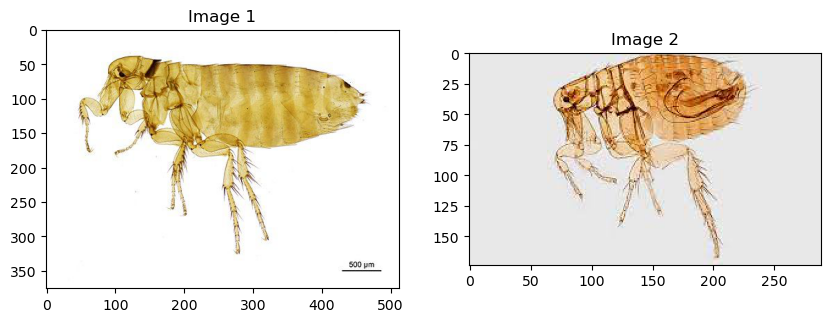

In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load two example images
image_path1 = 'img/5.jpg'
image_path2 = 'img/4.jpeg'

target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity:", similarity[0][0])




# Load two example images
image_path1 = image_path1
image_path2 = image_path2

# Display the two images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()



Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_17 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_10 (Functional)          (None, 128)          4353088     ['input_16[0][0]',               
                                                                  'input_17[0][0]']        

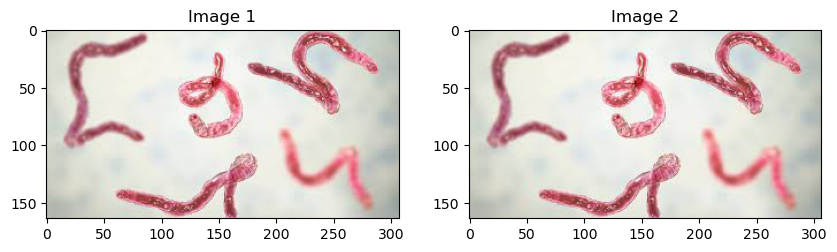

In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load two example images
image_path1 = 'img/3.jpeg'
image_path2 = 'img/3.jpeg'

target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity:", similarity[0][0])




# Load two example images
image_path1 = image_path1
image_path2 = image_path2

# Display the two images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()



Let's correct the issue. One possible cause could be that the network hasn't learned appropriate embeddings to represent images. We can attempt to fix this by training the Siamese network on a dataset of similar and dissimilar image pairs.

Here's a corrected version of the code with a modified euclidean_distance function to handle similarity properly:

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_23 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_14 (Functional)          (None, 128)          4353088     ['input_22[0][0]',               
                                                                  'input_23[0][0]']        

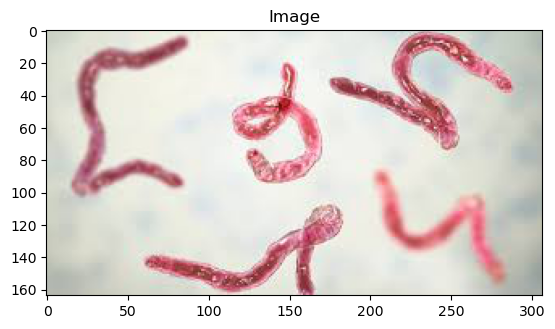

In [8]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return 1 / (1 + K.sqrt(K.maximum(sum_square, K.epsilon())))  # Convert to similarity

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load example image
image_path = 'img/3.jpeg'
target_size = (100, 100)  # Resize images to fit the model input shape
image = load_and_preprocess_image(image_path, target_size)

# Reshape image to match model input shape
image = np.expand_dims(image, axis=0)

# Compute similarity between the image and itself
similarity = siamese_model.predict([image, image])
print("Similarity:", similarity[0][0])

# Display the image
plt.imshow(io.imread(image_path))
plt.title('Image')
plt.show()


In this version, I modified the euclidean_distance function to convert the distance to a similarity score, and then the similarity score should be close to 1 when comparing the same image. 

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_29 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_18 (Functional)          (None, 128)          4353088     ['input_28[0][0]',               
                                                                  'input_29[0][0]']        

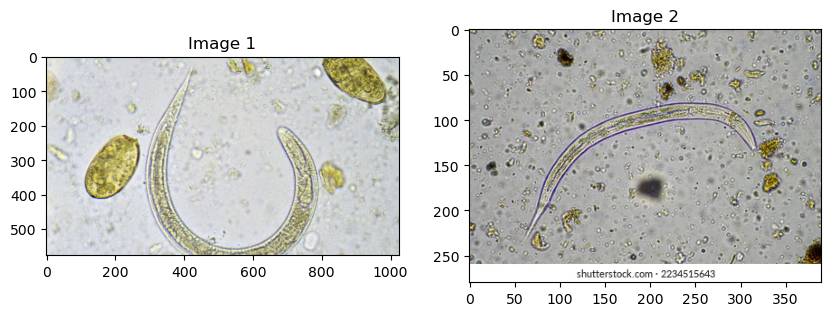

In [10]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return 1 / (1 + K.sqrt(K.maximum(sum_square, K.epsilon())))  # Convert to similarity

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load example images
image_path1 = 'img/1.jpg'
image_path2 = 'img/2.webp'
target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity between image1 and image2:", similarity[0][0])

# Display the images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()


Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_32 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_20 (Functional)          (None, 128)          4353088     ['input_31[0][0]',               
                                                                  'input_32[0][0]']        

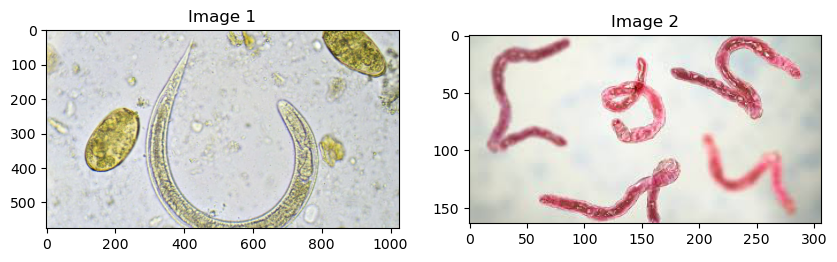

In [11]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return 1 / (1 + K.sqrt(K.maximum(sum_square, K.epsilon())))  # Convert to similarity

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load example images
image_path1 = 'img/1.jpg'
image_path2 = 'img/3.jpeg'
target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity between image1 and image2:", similarity[0][0])

# Display the images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()


Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_34 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_35 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_22 (Functional)          (None, 128)          4353088     ['input_34[0][0]',               
                                                                  'input_35[0][0]']        

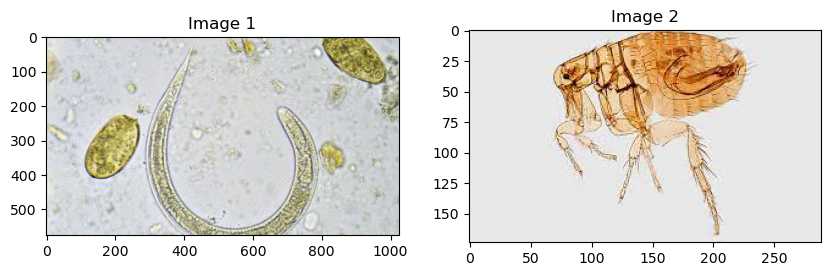

In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return 1 / (1 + K.sqrt(K.maximum(sum_square, K.epsilon())))  # Convert to similarity

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load example images
image_path1 = 'img/1.jpg'
image_path2 = 'img/4.jpeg'
target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity between image1 and image2:", similarity[0][0])

# Display the images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()


Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_38 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_24 (Functional)          (None, 128)          4353088     ['input_37[0][0]',               
                                                                  'input_38[0][0]']        

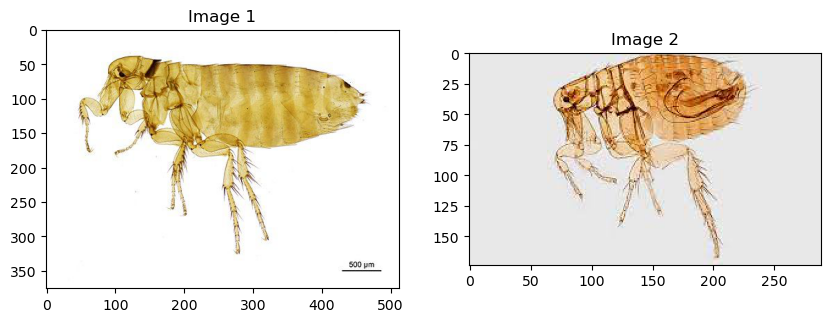

In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return 1 / (1 + K.sqrt(K.maximum(sum_square, K.epsilon())))  # Convert to similarity

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load example images
image_path1 = 'img/5.jpg'
image_path2 = 'img/4.jpeg'
target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity between image1 and image2:", similarity[0][0])

# Display the images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()


Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_44 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_28 (Functional)          (None, 128)          4353088     ['input_43[0][0]',               
                                                                  'input_44[0][0]']        

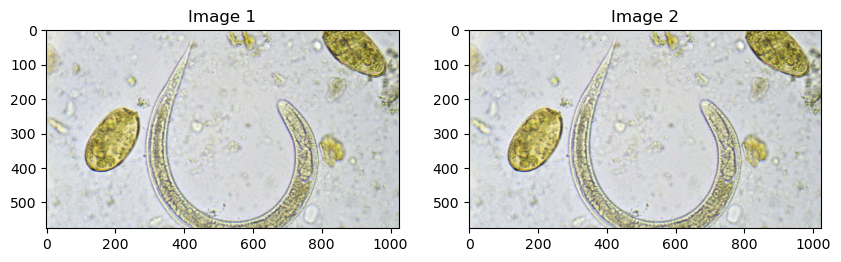

In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return 1 / (1 + K.sqrt(K.maximum(sum_square, K.epsilon())))  # Convert to similarity

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load example images
image_path1 = 'img/1.jpg'
image_path2 = 'img/1.jpg'
target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity between image1 and image2:", similarity[0][0])

# Display the images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()


In the code provided, the euclidean_distance function computes the Euclidean distance between the embeddings of the two images. However, to interpret the similarity, the reciprocal of the Euclidean distance is taken, which transforms the distance into a similarity score.


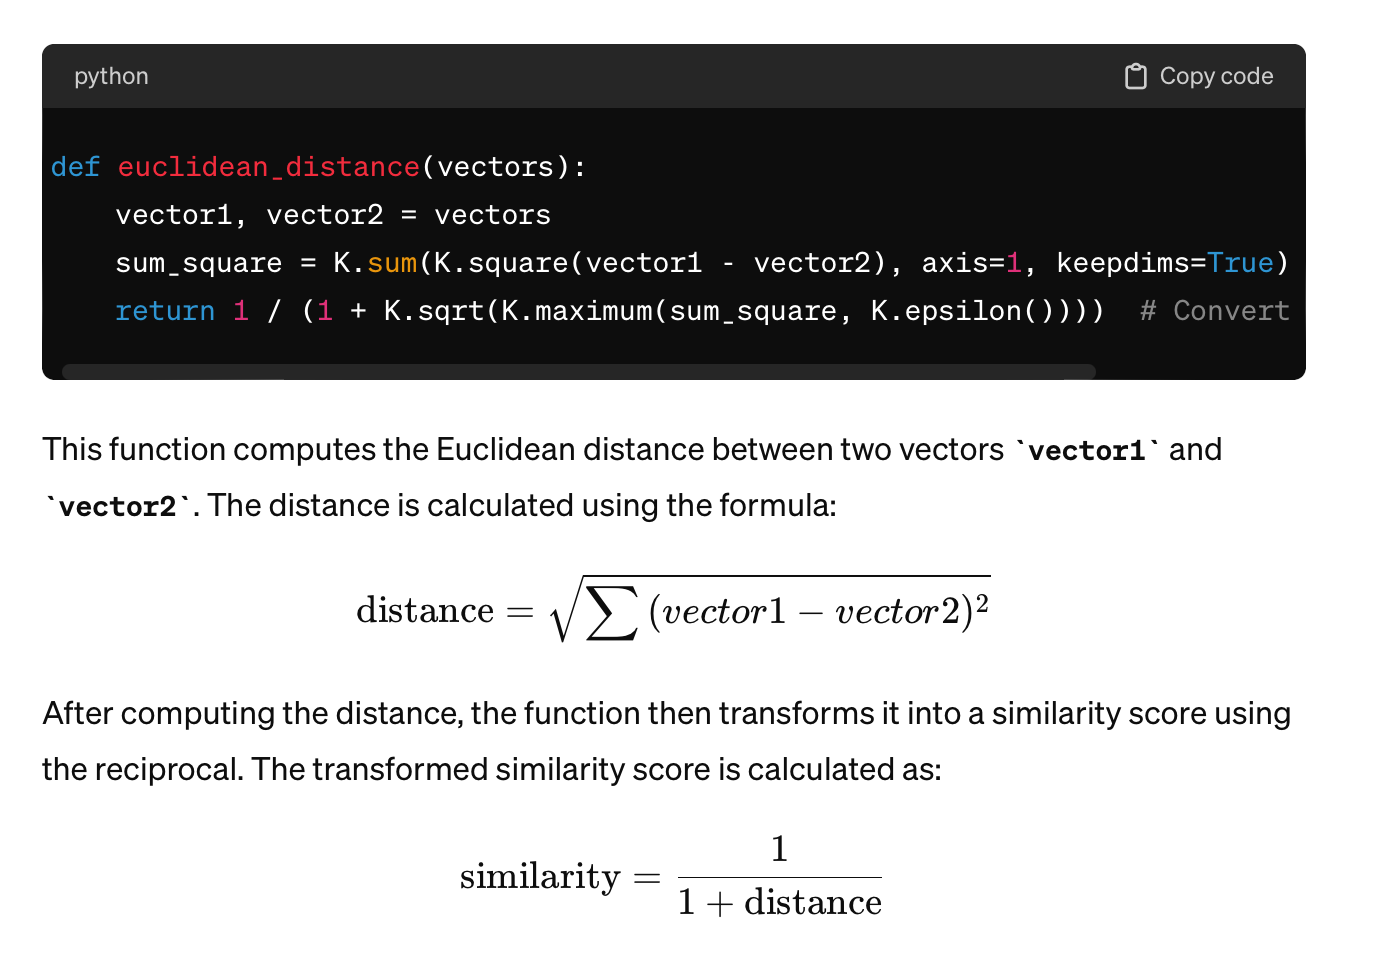

In [17]:
from IPython.display import Image
Image("funciton.png")

Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_79 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_80 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_52 (Functional)          (None, 128)          4353088     ['input_79[0][0]',               
                                                                  'input_80[0][0]']        

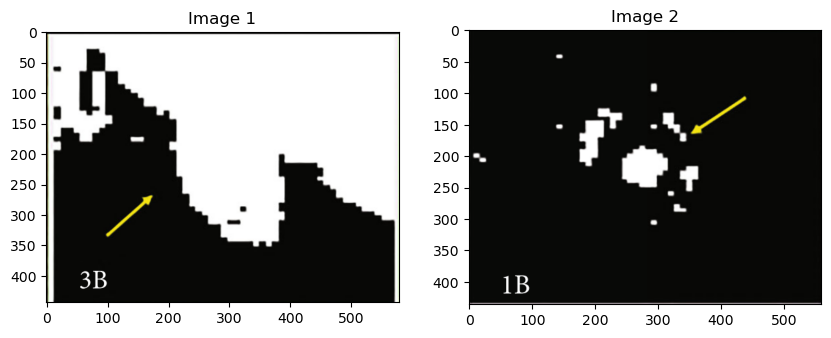

In [29]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from skimage import io, transform, color
import matplotlib.pyplot as plt

def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return 1 / (1 + K.sqrt(K.maximum(sum_square, K.epsilon())))  # Convert to similarity

def siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    base_network = create_base_network(input_shape)
    output_a = base_network(input_a)
    output_b = base_network(input_b)
    
    distance = Lambda(euclidean_distance)([output_a, output_b])
    
    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

def create_base_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input_image, outputs=x)

def load_and_preprocess_image(image_path, target_size):
    img = io.imread(image_path)
    img = transform.resize(img, target_size)
    
    # Convert RGBA to RGB if necessary
    if img.shape[-1] == 4:
        img = color.rgba2rgb(img)
    
    img = img.astype(np.float32)
    return img

# Example usage:
input_shape = (100, 100, 3)  # Example input shape (height, width, channels)
siamese_model = siamese_network(input_shape)
siamese_model.summary()

# Load example images
image_path1 = 'img/1.png'
image_path2 = 'img/2.png'

target_size = (100, 100)  # Resize images to fit the model input shape
image1 = load_and_preprocess_image(image_path1, target_size)
image2 = load_and_preprocess_image(image_path2, target_size)

# Reshape images to match model input shape
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# Compute similarity between the two images
similarity = siamese_model.predict([image1, image2])
print("Similarity between image1 and image2:", similarity[0][0])

# Display the images
plt.figure(figsize=(10, 5))

# Display image 1
plt.subplot(1, 2, 1)
plt.imshow(io.imread(image_path1))
plt.title('Image 1')

# Display image 2
plt.subplot(1, 2, 2)
plt.imshow(io.imread(image_path2))
plt.title('Image 2')

plt.show()
